In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from datetime import datetime, date
import keras
from keras.models import Sequential
from keras.layers import Dense

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

atm_index=18

# Data import

In [2]:
dataset_train=pd.read_csv('NN5_FINAL_DATASET_TRAIN.csv', header=0)
dataset_test=pd.read_csv('NN5_FINAL_DATASET_TEST.csv', header=0)

In [3]:
dataset_test.head()

,name,weekday,day_of_month,month_of_year,year,day_of_year,week_of_year,value
0,NN5-001,1,23,3,1998,82,12,19.940476
1,NN5-001,2,24,3,1998,83,12,28.613946
2,NN5-001,3,25,3,1998,84,12,37.046485
3,NN5-001,4,26,3,1998,85,12,60.926871
4,NN5-001,5,27,3,1998,86,12,49.404762


# Data analysis
### Getting the average value for the name, day of the week, and so on

In [4]:
train = dataset_train.values
test = dataset_test.values

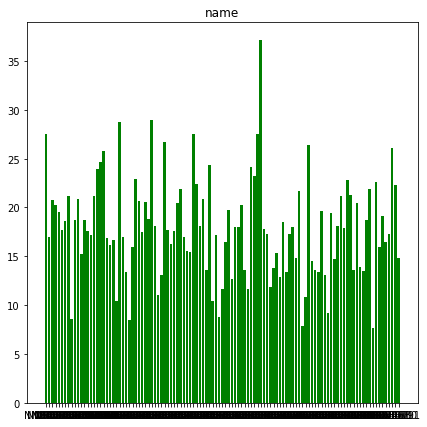

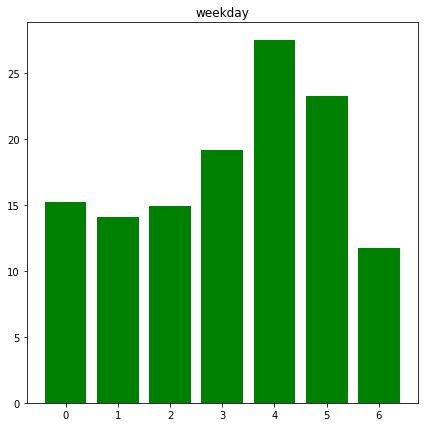

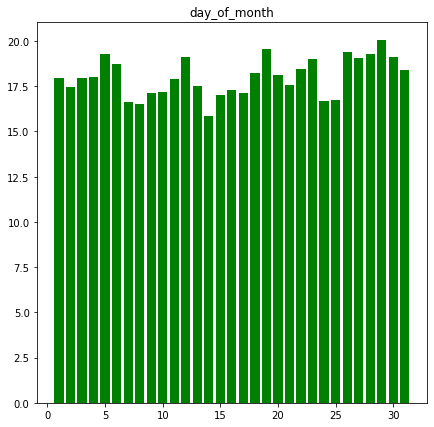

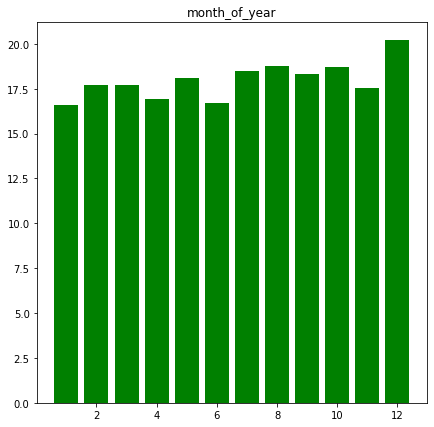

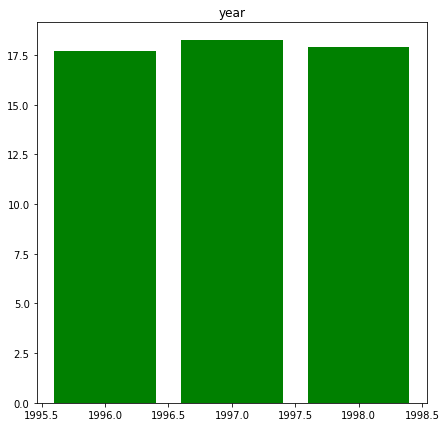

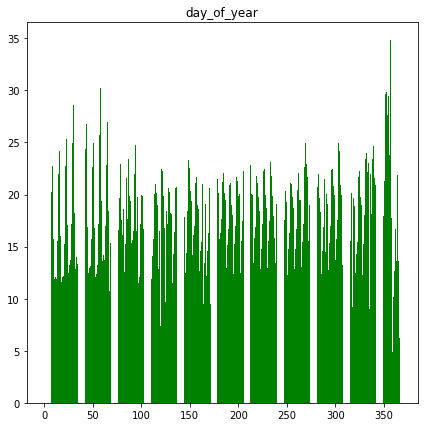

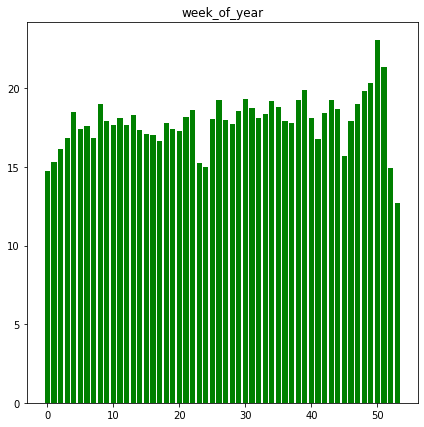

In [5]:
plt.rcParams["figure.figsize"] = (7, 7)
Xs = {}
Xn = {}
for j in range(7):
    Xs[j] = {}
    Xn[j] = {}
    for i in range(len(train)):
        d = train[i][j]
        v = train[i][-1]
        if d in Xs[j]:
            Xs[j][d] += v
            Xn[j][d] += 1
        else:
            Xs[j][d] = v
            Xn[j][d] = 1
for j in range(7):
    for d in Xs[j]:
        Xs[j][d] /= Xn[j][d]

titles = ["name", "weekday", "day_of_month", "month_of_year", "year", "day_of_year", "week_of_year"]
for i in range(0,7):
    plt.bar(Xs[i].keys(), Xs[i].values(), color="green")
    plt.title(titles[i])
    plt.show()


# Preparing data

In [6]:
dataset_train_in_weeks = dataset_train[['name', 'year', 'week_of_year', 'value' ]]
dataset_train_in_weeks=dataset_train_in_weeks.reset_index().groupby(['name', 'year', 'week_of_year'])[['value']].sum().reset_index()
dataset_train_in_weeks['av_of_month_before_prev_4_weeks']=dataset_train_in_weeks['value'].rolling(window = 4).mean().shift(4)
dataset_train_in_weeks['sum_of_prev_week']=dataset_train_in_weeks['value'].shift(1)

dataset_test_in_weeks = dataset_test[['name', 'year',  'week_of_year', 'value' ]]

dataset_test_in_weeks=dataset_test_in_weeks.reset_index().groupby(['name', 'year', 'week_of_year'])[['value']].sum().reset_index()

dataset_test_in_weeks=dataset_test_in_weeks.sort_values(by=['week_of_year', 'name'])
print(len(dataset_test_in_weeks))
dataset_train_in_weeks=dataset_train_in_weeks.sort_values(by=['year','week_of_year', 'name'])
dataset_test_in_weeks = pd.concat([dataset_train_in_weeks[-111*12:], dataset_test_in_weeks])
dataset_test_in_weeks=dataset_test_in_weeks.sort_values(by=[ 'name', 'year', 'week_of_year'])
dataset_train_in_weeks=dataset_train_in_weeks.sort_values(by=[ 'name', 'year', 'week_of_year'])
dataset_train_in_weeks=dataset_train_in_weeks.dropna()
print(len(dataset_test_in_weeks))
dataset_test_in_weeks['av_of_month_before_prev_4_weeks']=dataset_test_in_weeks['value'].rolling(window = 4).mean().shift(4)
dataset_test_in_weeks['sum_of_prev_week']=dataset_test_in_weeks['value'].shift(1)

dataset_test_in_weeks.rename(columns={'value': 'sum_of_week'}, inplace=True)
dataset_train_in_weeks.rename(columns={'value': 'sum_of_week'}, inplace=True)
dataset_test_in_weeks=dataset_test_in_weeks.sort_values(by=['year','week_of_year', 'name'])
dataset_test_in_weeks=dataset_test_in_weeks[111*8:]
dataset_test_in_weeks=dataset_test_in_weeks.sort_values(by=[ 'name', 'year', 'week_of_year'])
print(len(dataset_test_in_weeks))

888
2220
1332


In [7]:
dataset_test_in_weeks[:10]

,name,year,week_of_year,sum_of_week,av_of_month_before_prev_4_weeks,sum_of_prev_week
103,NN5-001,1998,8,253.897392,234.945437,255.952381
104,NN5-001,1998,9,207.808957,239.831349,253.897392
105,NN5-001,1998,10,250.921202,251.799887,207.808957
106,NN5-001,1998,11,259.169501,253.596230,250.921202
0,NN5-001,1998,12,254.280045,252.455357,259.169501
1,NN5-001,1998,13,260.572562,243.689768,254.280045
2,NN5-001,1998,14,262.585034,242.144983,260.572562
3,NN5-001,1998,15,259.056122,242.949263,262.585034
4,NN5-001,1998,16,255.711451,243.044926,259.056122
5,NN5-001,1998,17,292.786281,256.235828,255.711451


In [8]:
dataset_train=dataset_train.sort_values(by=['year','month_of_year', 'day_of_month', 'name'])
dataset_test=dataset_test.sort_values(by=['year','month_of_year', 'day_of_month', 'name'])
dataset_test = pd.concat([dataset_train[-111*56:], dataset_test])
dataset_test=dataset_test.sort_values(by=[ 'name', 'year', 'year','month_of_year', 'day_of_month'])
dataset_train=dataset_train.sort_values(by=[ 'name', 'year', 'year','month_of_year', 'day_of_month'])
dataset_train = dataset_train.merge(dataset_train_in_weeks, on=["name", 'year', 'week_of_year'])
dataset_test = dataset_test.merge(dataset_test_in_weeks,  on=["name",  'year', 'week_of_year'])

In [9]:
dataset_test[:10]

,name,weekday,day_of_month,month_of_year,year,day_of_year,week_of_year,value,sum_of_week,av_of_month_before_prev_4_weeks,sum_of_prev_week
0,NN5-001,1,23,2,1998,54,8,21.230159,253.897392,234.945437,255.952381
1,NN5-001,2,24,2,1998,55,8,29.733560,253.897392,234.945437,255.952381
2,NN5-001,3,25,2,1998,56,8,42.871315,253.897392,234.945437,255.952381
3,NN5-001,4,26,2,1998,57,8,62.471655,253.897392,234.945437,255.952381
4,NN5-001,5,27,2,1998,58,8,45.493197,253.897392,234.945437,255.952381
5,NN5-001,6,28,2,1998,59,8,33.489229,253.897392,234.945437,255.952381
6,NN5-001,0,1,3,1998,60,8,18.608277,253.897392,234.945437,255.952381
7,NN5-001,1,2,3,1998,61,9,24.333900,207.808957,239.831349,253.897392
8,NN5-001,2,3,3,1998,62,9,26.927438,207.808957,239.831349,253.897392
9,NN5-001,3,4,3,1998,63,9,40.717120,207.808957,239.831349,253.897392


# Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
dataset_test_without_preprocessing=dataset_test
dataset_train_without_preprocessing=dataset_train

columns=['av_of_month_before_prev_4_weeks', 'sum_of_prev_week']
v_transformer = RobustScaler()
w_transformer = RobustScaler()
f_transformer = RobustScaler()
l_transformer = LabelEncoder()

l_transformer=l_transformer.fit(dataset_train[['name']].to_numpy())
w_transformer=w_transformer.fit(dataset_train[['sum_of_week']].to_numpy())
v_transformer=v_transformer.fit(dataset_train[['value']].to_numpy())
f_transformer=f_transformer.fit(dataset_train[columns].to_numpy())

dataset_train['name']=l_transformer.transform(dataset_train[['name']].to_numpy())
dataset_train['value']=v_transformer.transform(dataset_train[['value']].to_numpy())
dataset_train['sum_of_week']=w_transformer.transform(dataset_train[['sum_of_week']].to_numpy())
dataset_train.loc[:, columns]=f_transformer.transform(dataset_train[columns].to_numpy())


dataset_test['name']=l_transformer.transform(dataset_test[['name']].to_numpy())
dataset_test['value']=v_transformer.transform(dataset_test[['value']].to_numpy())
dataset_test['sum_of_week']=w_transformer.transform(dataset_test[['sum_of_week']].to_numpy())
dataset_test.loc[:, columns]=f_transformer.transform(dataset_test[columns].to_numpy())

In [11]:
dataset_test.head()

,name,weekday,day_of_month,month_of_year,year,day_of_year,week_of_year,value,sum_of_week,av_of_month_before_prev_4_weeks,sum_of_prev_week
0,0,1,23,2,1998,54,8,0.436309,2.485548,2.368965,2.490134
1,0,2,24,2,1998,55,8,1.177912,2.485548,2.368965,2.490134
2,0,3,25,2,1998,56,8,2.323687,2.485548,2.368965,2.490134
3,0,4,26,2,1998,57,8,4.033081,2.485548,2.368965,2.490134
4,0,5,27,2,1998,58,8,2.552348,2.485548,2.368965,2.490134


# Create dataset

In [12]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

#LSTM-ITER in weeks

In [13]:
dataset_train = dataset_train[dataset_train['name']==atm_index]
dataset_test = dataset_test[dataset_test['name']==atm_index]
train=dataset_train[['sum_of_prev_week', 'sum_of_week', 'av_of_month_before_prev_4_weeks']].drop_duplicates(keep='first')
test=dataset_test[['sum_of_prev_week', 'sum_of_week', 'av_of_month_before_prev_4_weeks']].drop_duplicates(keep='first')
test=test.reset_index()
test.drop(['index'], axis='columns', inplace=True)
train=train.reset_index()
train.drop(['index'], axis='columns', inplace=True)

In [14]:
time_steps = 4

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sum_of_week, time_steps)
X_test, y_test = create_dataset(test, test.sum_of_week, time_steps)

print(X_test.shape, y_test.shape)

(8, 4, 3) (8,)


In [15]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=64, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
# model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=20, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
5/5 [==============================] - 5s 194ms/step - loss: 1.2851 - val_loss: 0.7286
Epoch 2/30
5/5 [==============================] - 0s 11ms/step - loss: 0.6562 - val_loss: 0.4710
Epoch 3/30
5/5 [==============================] - 0s 11ms/step - loss: 0.4237 - val_loss: 0.4093
Epoch 4/30
5/5 [==============================] - 0s 10ms/step - loss: 0.4506 - val_loss: 0.4064
Epoch 5/30
5/5 [==============================] - 0s 11ms/step - loss: 0.4358 - val_loss: 0.4065
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 0.3976 - val_loss: 0.4219
Epoch 7/30
5/5 [==============================] - 0s 10ms/step - loss: 0.3941 - val_loss: 0.4322
Epoch 8/30
5/5 [==============================] - 0s 10ms/step - loss: 0.3967 - val_loss: 0.4262
Epoch 9/30
5/5 [==============================] - 0s 12ms/step - loss: 0.3878 - val_loss: 0.4125
Epoch 10/30
5/5 [==============================] - 0s 10ms/step - loss: 0.3761 - val_loss: 0.4028
Epoch 11/30
5/5 [===========

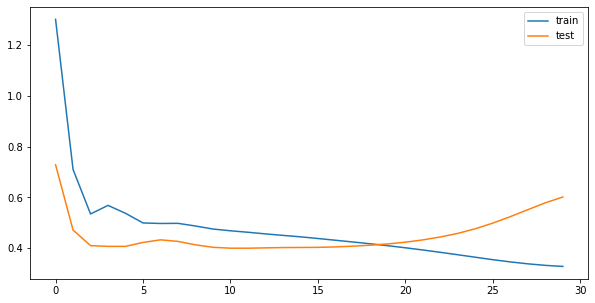

In [17]:
rcParams['figure.figsize'] = 10, 5
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 128)               34816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 34,945
Trainable params: 34,945
Non-trainable params: 0
_________________________________________________________________


In [19]:
y_pred_inv=[]
test_for_predicting=test
for i in range(8):
  test_for_predicting.loc[i+time_steps+1, 'sum_of_prev_week']=test_for_predicting.loc[i+time_steps, 'sum_of_week']
  X_test1, y_test1 = create_dataset(test_for_predicting[i:i+time_steps+1], test_for_predicting[i:i+time_steps+1].sum_of_week, time_steps)
  y_pred1 = model.predict(X_test1)
  test_for_predicting.loc[i+time_steps+1, 'sum_of_week']=y_pred1
  y_pred_inv1 = w_transformer.inverse_transform(y_pred1)
  
  y_pred_inv+=y_pred_inv1[0].tolist()

In [20]:
y_test_in_days=dataset_test['value'].values[28:]
y_test_in_days_inv=v_transformer.inverse_transform(y_test_in_days.reshape(1, -1))
y_train_inv = w_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = w_transformer.inverse_transform(y_test.reshape(1, -1))

### interpolation


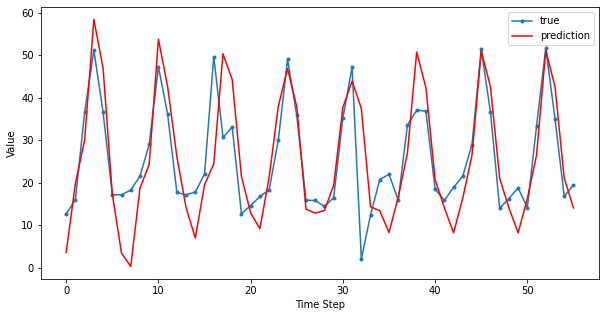

In [21]:
y_pred_in_days=[]
for i in range(8):
  percents=[0]*7
  for k in range(3):
    y_prev_week=dataset_test_without_preprocessing[(dataset_test_without_preprocessing['week_of_year']==i+9+k) & (dataset_test_without_preprocessing['year']==1998)].value.values
    sum1=float(y_prev_week.sum())
    for j in range(7):
      percents[j]+=y_prev_week[j]/sum1/3
  per_sum=np.sum(percents)
  for j in range(7): 
    percents[j]=percents[j]/per_sum
    y_pred_in_days.append(y_pred_inv[j]*percents[j])

rcParams['figure.figsize'] = 10, 5
plt.plot(y_test_in_days_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_in_days, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#NN-ITER in weeks

In [22]:
dataset_train = dataset_train[dataset_train['name']==atm_index]
dataset_test = dataset_test[dataset_test['name']==atm_index]
train=dataset_train[['sum_of_prev_week', 'sum_of_week', 'av_of_month_before_prev_4_weeks']].drop_duplicates(keep='first')
test=dataset_test[['sum_of_prev_week', 'sum_of_week', 'av_of_month_before_prev_4_weeks']].drop_duplicates(keep='first')
test=test.reset_index()
test.drop(['index'], axis='columns', inplace=True)
train=train.reset_index()
train.drop(['index'], axis='columns', inplace=True)

In [23]:
time_steps = 4

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sum_of_week, time_steps)
X_test, y_test = create_dataset(test, test.sum_of_week, time_steps)

print(X_test.shape, y_test.shape)

(8, 4, 3) (8,)


In [24]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2] )
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2] )


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(
    X_train, y_train, 
    epochs=15, 
    batch_size=20, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/15
5/5 [==============================] - 0s 31ms/step - loss: 1.1631 - val_loss: 0.6878
Epoch 2/15
5/5 [==============================] - 0s 8ms/step - loss: 0.6443 - val_loss: 0.4696
Epoch 3/15
5/5 [==============================] - 0s 10ms/step - loss: 0.4002 - val_loss: 0.4217
Epoch 4/15
5/5 [==============================] - 0s 10ms/step - loss: 0.4075 - val_loss: 0.4386
Epoch 5/15
5/5 [==============================] - 0s 7ms/step - loss: 0.3739 - val_loss: 0.4583
Epoch 6/15
5/5 [==============================] - 0s 8ms/step - loss: 0.3435 - val_loss: 0.4923
Epoch 7/15
5/5 [==============================] - 0s 7ms/step - loss: 0.3470 - val_loss: 0.5014
Epoch 8/15
5/5 [==============================] - 0s 8ms/step - loss: 0.3385 - val_loss: 0.4968
Epoch 9/15
5/5 [==============================] - 0s 7ms/step - loss: 0.3197 - val_loss: 0.4991
Epoch 10/15
5/5 [==============================] - 0s 8ms/step - loss: 0.3072 - val_loss: 0.5127
Epoch 11/15
5/5 [===================

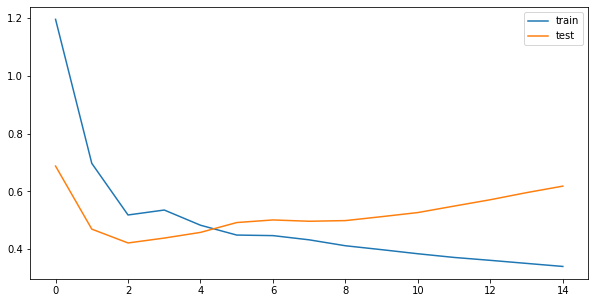

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [27]:
y_pred_inv=[]
test_for_predicting=test
for i in range(8):
  test_for_predicting.loc[i+time_steps+1, 'sum_of_prev_week']=test_for_predicting.loc[i+time_steps, 'sum_of_week']
  X_test1, y_test1 = create_dataset(test_for_predicting[i:i+time_steps+1], test_for_predicting[i:i+time_steps+1].sum_of_week, time_steps)
  X_test1= X_test1.reshape(X_test1.shape[0],X_test1.shape[1]*X_test1.shape[2] )
  y_pred1 = model.predict(X_test1)
  test_for_predicting.loc[i+time_steps+1, 'sum_of_week']=y_pred1
  y_pred_inv1 = w_transformer.inverse_transform(y_pred1)
  
  y_pred_inv+=y_pred_inv1[0].tolist()

In [28]:
y_test_in_days=dataset_test['value'].values[28:]
y_test_in_days_inv=v_transformer.inverse_transform(y_test_in_days.reshape(1, -1))
y_train_inv = w_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = w_transformer.inverse_transform(y_test.reshape(1, -1))

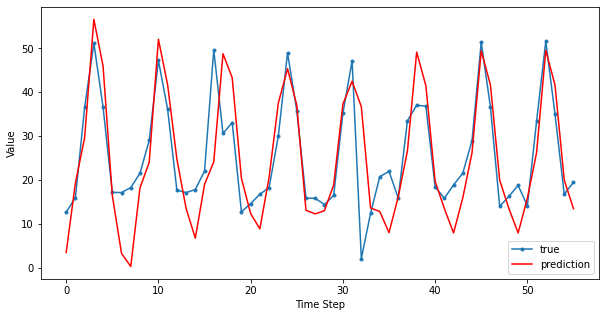

In [29]:
y_pred_in_days=[]
for i in range(8):
  percents=[0]*7
  for k in range(-1,2):
    y_prev_week=dataset_test_without_preprocessing[(dataset_test_without_preprocessing['week_of_year']==i+10+k) & (dataset_test_without_preprocessing['year']==1998)].value.values
    sum1=float(y_prev_week.sum())
    for j in range(7):
      percents[j]+=y_prev_week[j]/sum1/3
  per_sum=np.sum(percents)
  for j in range(7): 
    percents[j]=percents[j]/per_sum
    y_pred_in_days.append(y_pred_inv[j]*percents[j])

rcParams['figure.figsize'] = 10, 5
plt.plot(y_test_in_days_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_in_days, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

# LSTM-ITER in days

In [30]:
dataset_train = dataset_train[dataset_train['name']==atm_index]
dataset_test = dataset_test[dataset_test['name']==atm_index]
train=dataset_train[['sum_of_prev_week', 'value']].drop_duplicates(keep='first')
test=dataset_test[['sum_of_prev_week', 'value']].drop_duplicates(keep='first')
test=test.reset_index()
test.drop(['index'], axis='columns', inplace=True)
train=train.reset_index()
train.drop(['index'], axis='columns', inplace=True)

In [31]:
time_steps = 28

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.value, time_steps)
X_test, y_test = create_dataset(test, test.value, time_steps)

print(X_test.shape, y_test.shape)

(56, 28, 2) (56,)


In [32]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2]),
      return_sequences=True
    )
  )
)
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      return_sequences=True
    )
  )
)
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=64, 
      return_sequences=True
    )
  )
)
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=64
    )
  )
)

model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
history = model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=20, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/200
32/32 [==============================] - 13s 91ms/step - loss: 1.5829 - val_loss: 1.5479
Epoch 2/200
32/32 [==============================] - 1s 22ms/step - loss: 1.3025 - val_loss: 1.7893
Epoch 3/200
32/32 [==============================] - 1s 20ms/step - loss: 1.0580 - val_loss: 1.6559
Epoch 4/200
32/32 [==============================] - 1s 20ms/step - loss: 0.9098 - val_loss: 1.6937
Epoch 5/200
32/32 [==============================] - 1s 20ms/step - loss: 0.9015 - val_loss: 1.3694
Epoch 6/200
32/32 [==============================] - 1s 20ms/step - loss: 0.8629 - val_loss: 1.3631
Epoch 7/200
32/32 [==============================] - 1s 20ms/step - loss: 0.8525 - val_loss: 1.3690
Epoch 8/200
32/32 [==============================] - 1s 20ms/step - loss: 0.8323 - val_loss: 1.2335
Epoch 9/200
32/32 [==============================] - 1s 20ms/step - loss: 0.8577 - val_loss: 1.2175
Epoch 10/200
32/32 [==============================] - 1s 20ms/step - loss: 0.8011 - val_loss: 1.145

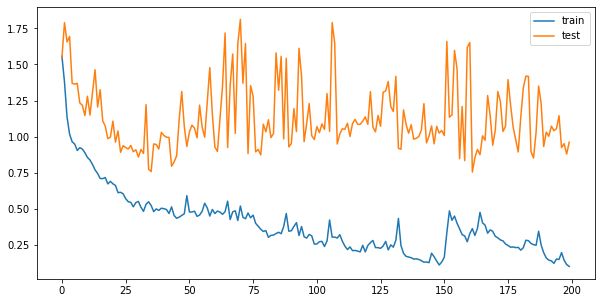

In [34]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 28, 256)           134144    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 28, 256)           394240    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 28, 128)           164352    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 791,681
Trainable params: 791,681
Non-trainable params: 0
________________________________________________

In [36]:
y_pred_inv=[]
test_for_predicting=test
for i in range(X_test.shape[0]):
  if i%7==0:
    test_for_predicting.loc[i+time_steps+1:i+time_steps+8, 'sum_of_prev_week']=test_for_predicting.loc[i+time_steps-7:i+time_steps, 'value'].sum()
  X_test1, y_test1 = create_dataset(test_for_predicting[i:i+time_steps+1], test_for_predicting[i:i+time_steps+1].value, time_steps)
  y_pred1 = model.predict(X_test1)
  test_for_predicting.loc[i+time_steps+1, 'value']=y_pred1
  y_pred_inv1 = v_transformer.inverse_transform(y_pred1)
  
  y_pred_inv+=y_pred_inv1[0].tolist()

In [37]:
y_train_inv = v_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = v_transformer.inverse_transform(y_test.reshape(1, -1))

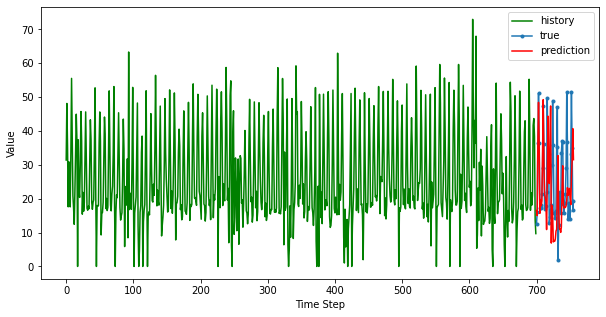

In [38]:
rcParams['figure.figsize'] = 10, 5
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

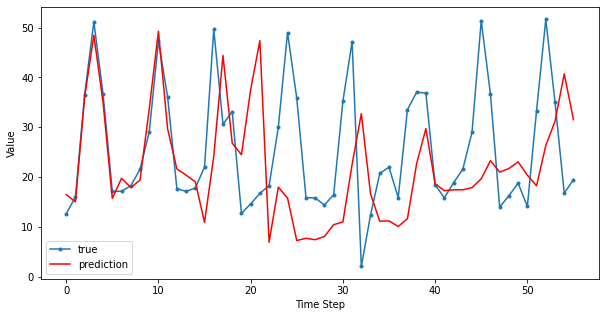

In [39]:
rcParams['figure.figsize'] = 10, 5
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();